<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/normalized_gradient_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

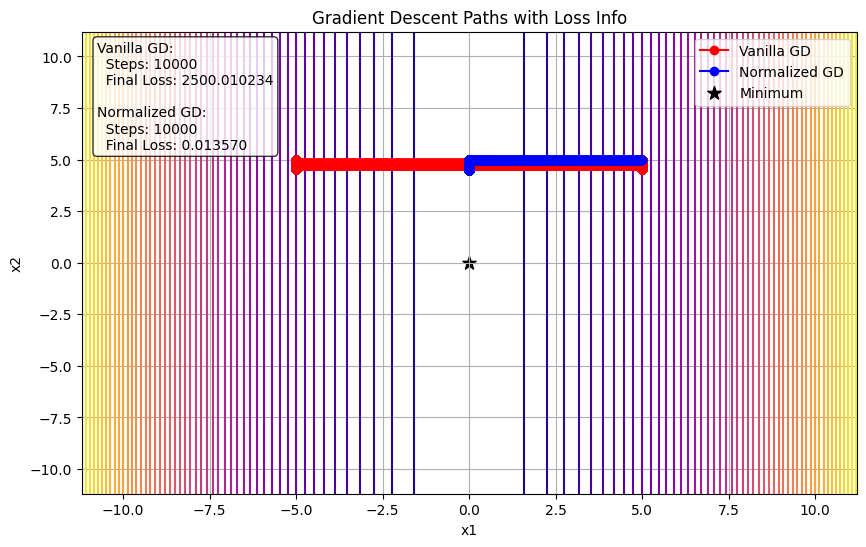

Final normalized GD point: [0.00582908 4.510571  ]
Final x1² term: 0.003397815154632627
Final x2² term: 0.010172625380036514


In [49]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 100 * x[0]**2 + 0.0005*x[1]**2

def grad_f(x):
    return np.array([200 * x[0], 0.001 * x[1]])

def run_descent(normalized=False, alpha=0.01, steps=10000):
    x = np.array([5.0, 5.0])
    path = [x.copy()]
    losses = [f(x)]
    for _ in range(steps):
        g = grad_f(x)
        if normalized:
            g = g / (np.linalg.norm(g) + np.finfo(float).eps)
        x = x - alpha * g
        path.append(x.copy())
        losses.append(f(x))
    return np.array(path), losses

vanilla_path, vanilla_losses = run_descent(normalized=False)
normalized_path, normalized_losses = run_descent(normalized=True)

x1_vals = np.linspace(-11.2, 11.2, 400)
x2_vals = np.linspace(-11.2, 11.2, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = 100 * X1**2 + 0.0005*X2**2

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=50, cmap='plasma')

plt.plot(vanilla_path[:, 0], vanilla_path[:, 1], 'ro-', label='Vanilla GD')
plt.plot(normalized_path[:, 0], normalized_path[:, 1], 'bo-', label='Normalized GD')
plt.scatter([0], [0], c='black', marker='*', s=100, label='Minimum')

# Info box in top-left without scientific notation
info_text = (
    f"Vanilla GD:\n"
    f"  Steps: {len(vanilla_path) - 1}\n"
    f"  Final Loss: {vanilla_losses[-1]:.6f}\n\n"
    f"Normalized GD:\n"
    f"  Steps: {len(normalized_path) - 1}\n"
    f"  Final Loss: {normalized_losses[-1]:.6f}"
)
plt.gca().text(
    0.02, 0.98, info_text, transform=plt.gca().transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.title("Gradient Descent Paths with Loss Info")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

print("Final normalized GD point:", normalized_path[-1])
print("Final x1² term:", 100 * normalized_path[-1][0]**2)
print("Final x2² term:", 0.0005 * normalized_path[-1][1]**2)



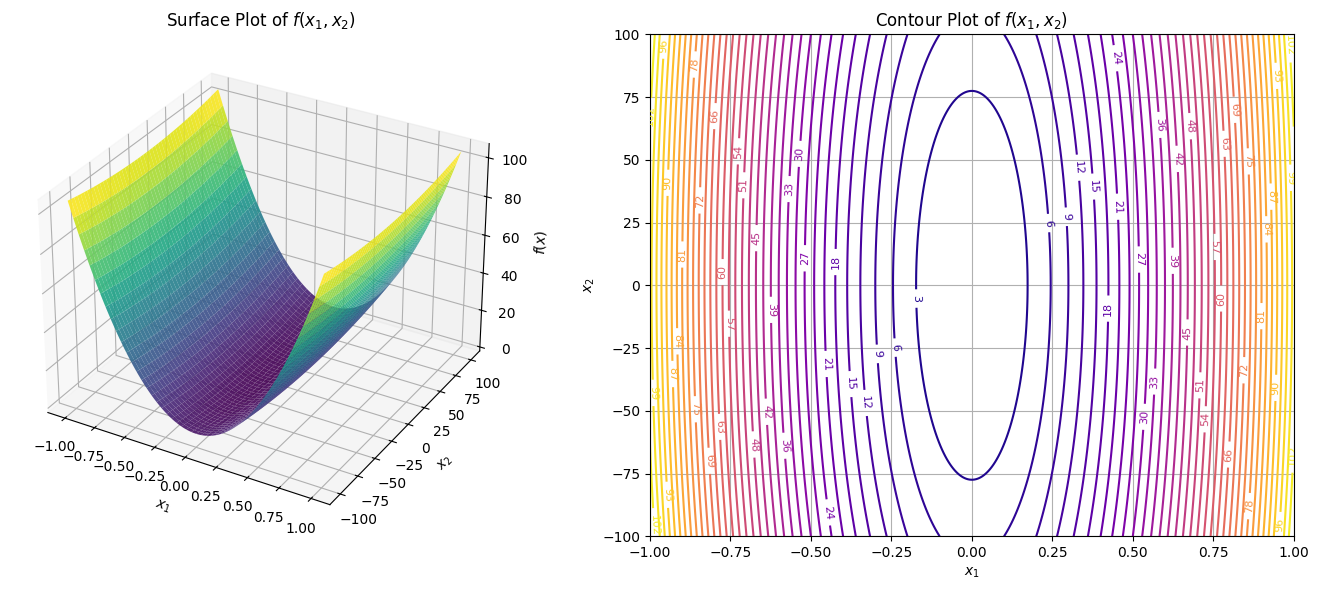

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x1, x2):
    return 100 * x1**2 + 0.0005 * x2**2

# Generate grid
x1 = np.linspace(-1, 1, 400)
x2 = np.linspace(-100, 100, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Plot surface and contour
fig = plt.figure(figsize=(14, 6))

# 3D surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax1.set_title('Surface Plot of $f(x_1, x_2)$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x)$')

# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(X1, X2, Z, levels=40, cmap='plasma')
ax2.clabel(contours, inline=True, fontsize=8)
ax2.set_title('Contour Plot of $f(x_1, x_2)$')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.grid(True)

plt.tight_layout()
plt.show()


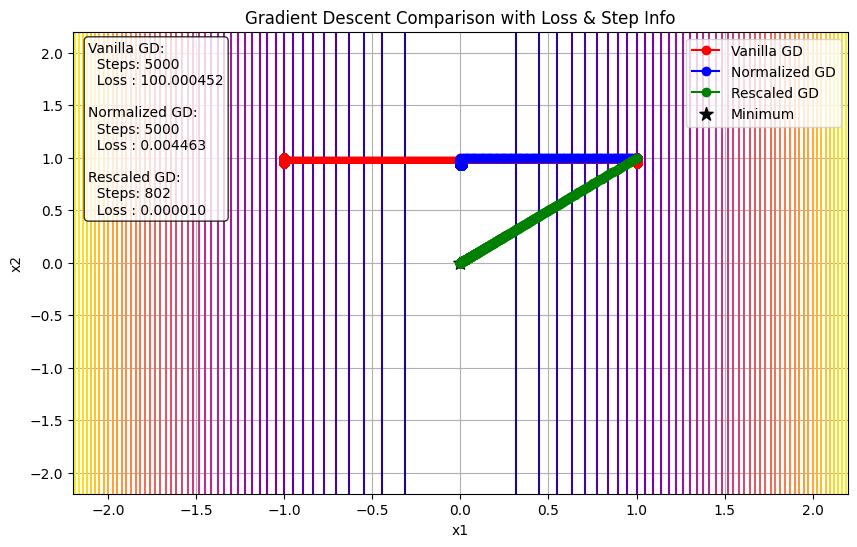

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def f(x):
    return 100 * x[0]**2 + 0.0005 * x[1]**2

# Gradient of the function
def grad_f(x):
    return np.array([200 * x[0], 0.001 * x[1]])

# Rescaled gradient using inverse of diagonal Hessian
def rescaled_grad_f(x):
    scale = np.array([1 / 200, 1 / 0.001])
    return grad_f(x) * scale

# Run descent using different methods
def run_descent(method='vanilla', alpha=0.01, max_steps=5000, tol=1e-5):
    x = np.array([1.0, 1.0])
    path = [x.copy()]
    losses = [f(x)]

    for _ in range(max_steps):
        if method == 'vanilla':
            g = grad_f(x)
        elif method == 'normalized':
            g = grad_f(x)
            g = g / np.linalg.norm(g)
        elif method == 'rescaled':
            g = rescaled_grad_f(x)
        else:
            raise ValueError("Unknown method")

        x = x - alpha * g
        path.append(x.copy())
        loss = f(x)
        losses.append(loss)

        if loss < tol:
            break

    return np.array(path), losses


# Run all three methods
vanilla_path, vanilla_losses = run_descent('vanilla')
normalized_path, normalized_losses = run_descent('normalized')
rescaled_path, rescaled_losses = run_descent('rescaled')

# Prepare contour grid
x1_vals = np.linspace(-2.2, 2.2, 400)
x2_vals = np.linspace(-2.2, 2.2, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = 100 * X1**2 + 0.0005 * X2**2

# Plot
plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=50, cmap='plasma')

# Plot paths
plt.plot(vanilla_path[:, 0], vanilla_path[:, 1], 'ro-', label='Vanilla GD')
plt.plot(normalized_path[:, 0], normalized_path[:, 1], 'bo-', label='Normalized GD')
plt.plot(rescaled_path[:, 0], rescaled_path[:, 1], 'go-', label='Rescaled GD')
plt.scatter([0], [0], c='black', marker='*', s=100, label='Minimum')

# Info box: steps and losses
info_text = (
    f"Vanilla GD:\n"
    f"  Steps: {len(vanilla_losses)-1}\n"
    f"  Loss : {vanilla_losses[-1]:.6f}\n\n"
    f"Normalized GD:\n"
    f"  Steps: {len(normalized_losses)-1}\n"
    f"  Loss : {normalized_losses[-1]:.6f}\n\n"
    f"Rescaled GD:\n"
    f"  Steps: {len(rescaled_losses)-1}\n"
    f"  Loss : {rescaled_losses[-1]:.6f}"
)
plt.gca().text(
    0.02, 0.98, info_text, transform=plt.gca().transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Final decorations
plt.title("Gradient Descent Comparison with Loss & Step Info")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


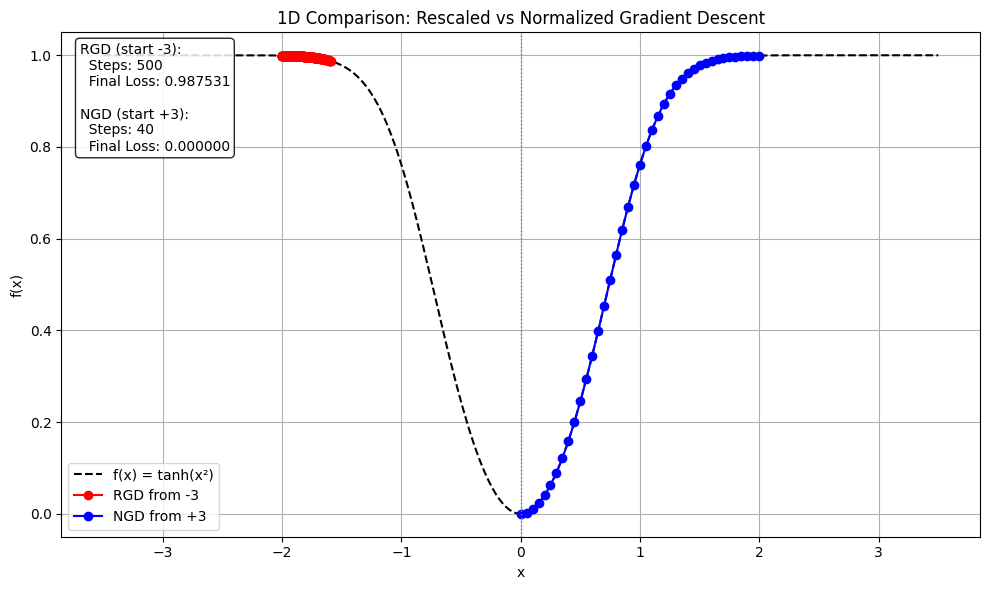

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Function and gradient
def f(x):
    return np.tanh(x**2)

def grad_f(x):
    return 2 * x * (1 - np.tanh(x**2)**2)

# Descent
def run_descent(x0, method='rgd', alpha=0.01, max_steps=500, tol=1e-5):
    x = x0
    path = [x]
    losses = [f(x)]

    for _ in range(max_steps):
        g = grad_f(x)
        if method == 'ngd':
            g = np.sign(g)  # fixed unit direction
        elif method == 'rgd':
            g = g  # raw gradient
        x = x - alpha * g
        path.append(x)
        losses.append(f(x))
        if f(x) < tol:
            break

    return np.array(path), np.array(losses)

# Run both
rgd_path, rgd_losses = run_descent(x0=-2.0, method='rgd', alpha=0.05)
ngd_path, ngd_losses = run_descent(x0=+2.0, method='ngd', alpha=0.05)

# Function curve
x_vals = np.linspace(-3.5, 3.5, 500)
f_vals = f(x_vals)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, 'k--', label='f(x) = tanh(x²)')
plt.plot(rgd_path, f(rgd_path), 'ro-', label='RGD from -3')
plt.plot(ngd_path, f(ngd_path), 'bo-', label='NGD from +3')
plt.axvline(0, color='gray', linestyle=':', linewidth=1)
plt.title("1D Comparison: Rescaled vs Normalized Gradient Descent")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# Info box
info_text = (
    f"RGD (start -3):\n"
    f"  Steps: {len(rgd_path)-1}\n"
    f"  Final Loss: {rgd_losses[-1]:.6f}\n\n"
    f"NGD (start +3):\n"
    f"  Steps: {len(ngd_path)-1}\n"
    f"  Final Loss: {ngd_losses[-1]:.6f}"
)
plt.gca().text(
    0.02, 0.98, info_text, transform=plt.gca().transAxes,
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.85)
)

plt.tight_layout()
plt.show()
